# Initial Exploration of the Top Tagging Jet Dataset

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
import numpy as np
import os
import h5py
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [9]:
input_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/top_tagging/raw_input"
input_file = "train.h5"

In [10]:
with pd.HDFStore(os.path.join(input_dir, input_file), mode='r') as store:
        df = store['table']

## Distributions

In [11]:
def plot_energies(jet_series): 
    energies = [jet_series[f'E_{i}'] for i in range(200)]
    sns.distplot(energies)

Maximum energy distribution

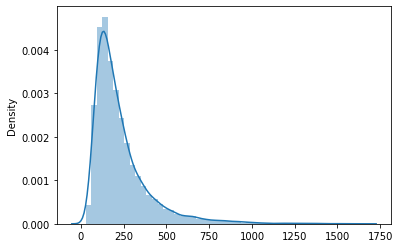

In [12]:
sns.distplot([df.iloc[i]["E_0"] for i in range(10000)])

In [16]:
df.columns.tolist()

['E_0',
 'PX_0',
 'PY_0',
 'PZ_0',
 'E_1',
 'PX_1',
 'PY_1',
 'PZ_1',
 'E_2',
 'PX_2',
 'PY_2',
 'PZ_2',
 'E_3',
 'PX_3',
 'PY_3',
 'PZ_3',
 'E_4',
 'PX_4',
 'PY_4',
 'PZ_4',
 'E_5',
 'PX_5',
 'PY_5',
 'PZ_5',
 'E_6',
 'PX_6',
 'PY_6',
 'PZ_6',
 'E_7',
 'PX_7',
 'PY_7',
 'PZ_7',
 'E_8',
 'PX_8',
 'PY_8',
 'PZ_8',
 'E_9',
 'PX_9',
 'PY_9',
 'PZ_9',
 'E_10',
 'PX_10',
 'PY_10',
 'PZ_10',
 'E_11',
 'PX_11',
 'PY_11',
 'PZ_11',
 'E_12',
 'PX_12',
 'PY_12',
 'PZ_12',
 'E_13',
 'PX_13',
 'PY_13',
 'PZ_13',
 'E_14',
 'PX_14',
 'PY_14',
 'PZ_14',
 'E_15',
 'PX_15',
 'PY_15',
 'PZ_15',
 'E_16',
 'PX_16',
 'PY_16',
 'PZ_16',
 'E_17',
 'PX_17',
 'PY_17',
 'PZ_17',
 'E_18',
 'PX_18',
 'PY_18',
 'PZ_18',
 'E_19',
 'PX_19',
 'PY_19',
 'PZ_19',
 'E_20',
 'PX_20',
 'PY_20',
 'PZ_20',
 'E_21',
 'PX_21',
 'PY_21',
 'PZ_21',
 'E_22',
 'PX_22',
 'PY_22',
 'PZ_22',
 'E_23',
 'PX_23',
 'PY_23',
 'PZ_23',
 'E_24',
 'PX_24',
 'PY_24',
 'PZ_24',
 'E_25',
 'PX_25',
 'PY_25',
 'PZ_25',
 'E_26',
 'PX_26',
 'PY_26

Distributions of P_x, P_y, P_z

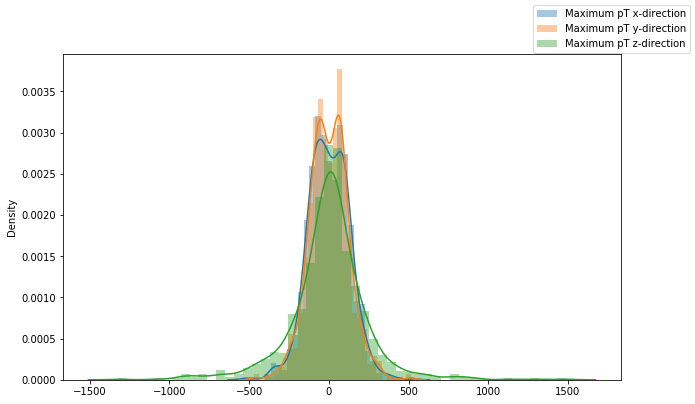

In [25]:
num_jets = 1000
fig = plt.figure(figsize=(10,6))
sns.distplot([df.iloc[i]["PX_0"] for i in range(num_jets)], label="Maximum pT x-direction")
sns.distplot([df.iloc[i]["PY_0"] for i in range(num_jets)], label="Maximum pT y-direction")
sns.distplot([df.iloc[i]["PZ_0"] for i in range(num_jets)], label="Maximum pT z-direction")
fig.legend()

## Calorimetry Image